In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
root = '/kaggle/input/rsna-2024-lumbar-spine-degenerative-classification/'
train  = pd.read_csv(root + 'train.csv')
label = pd.read_csv(root + 'train_label_coordinates.csv')
train_desc  = pd.read_csv(root + 'train_series_descriptions.csv')
test_desc   = pd.read_csv(root + 'test_series_descriptions.csv')
sub         = pd.read_csv(root + 'sample_submission.csv')

In [28]:
# Filtrar columnas y etiquetas para condiciones específicas
conditions_of_interest = [
    'spinal_canal_stenosis', 
    'left_neural_foraminal_narrowing', 
    'right_neural_foraminal_narrowing', 
    'left_subarticular_stenosis', 
    'right_subarticular_stenosis'
]
levels = ['l1_l2', 'l2_l3', 'l3_l4', 'l4_l5', 'l5_s1']
columns_of_interest = [f"{cond}_{level}" for cond in conditions_of_interest for level in levels]

In [29]:
# Crear el conjunto de datos de entrada y salida
df = train[['study_id'] + columns_of_interest].copy()
df.dropna(inplace=True)


In [30]:
# Codificar etiquetas de severidad
severity_encoder = LabelEncoder()
for col in columns_of_interest:
    df[col] = severity_encoder.fit_transform(df[col])

In [31]:
# Inicializar diccionarios para almacenar resultados
accuracy_dict = {}
report_dict = {}
importance_dict = {}

In [32]:
# Configuración para las "épocas" y k-fold cross-validation
num_folds = 5
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

Evaluando modelo para: spinal_canal_stenosis_l1_l2


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

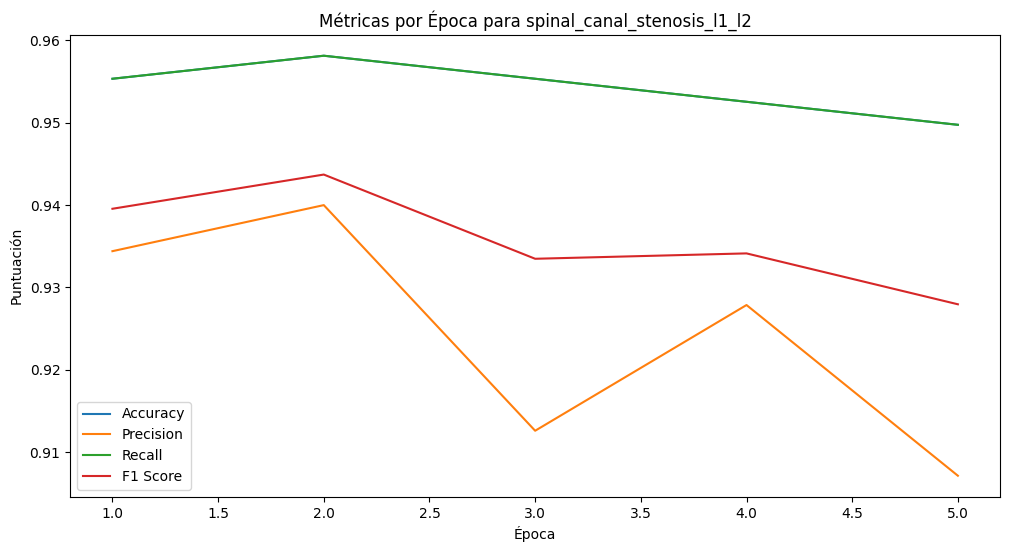

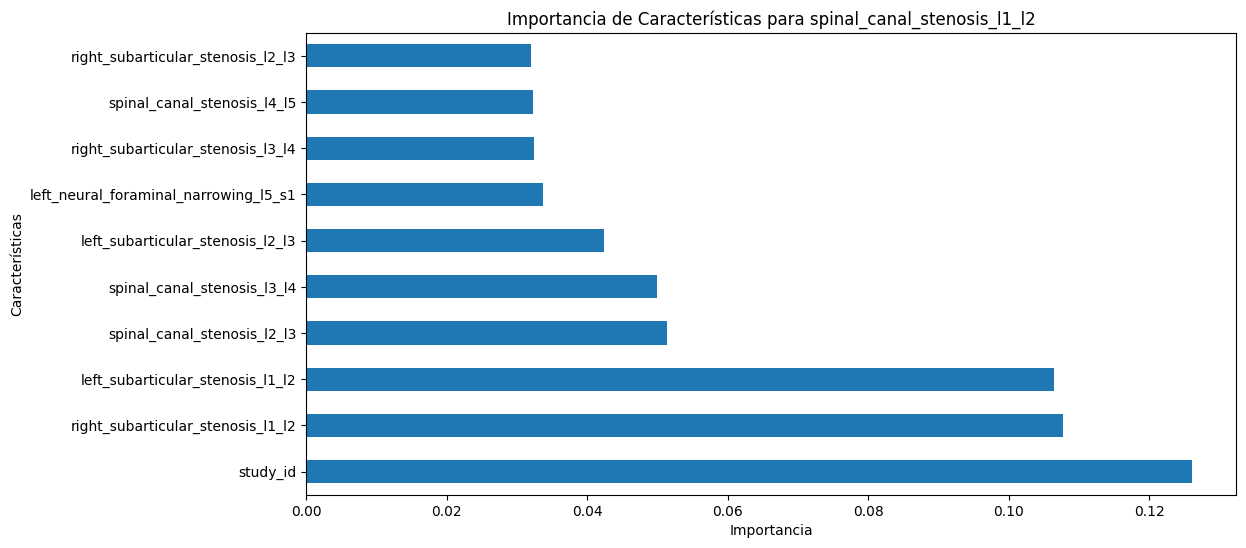

Evaluando modelo para: spinal_canal_stenosis_l2_l3


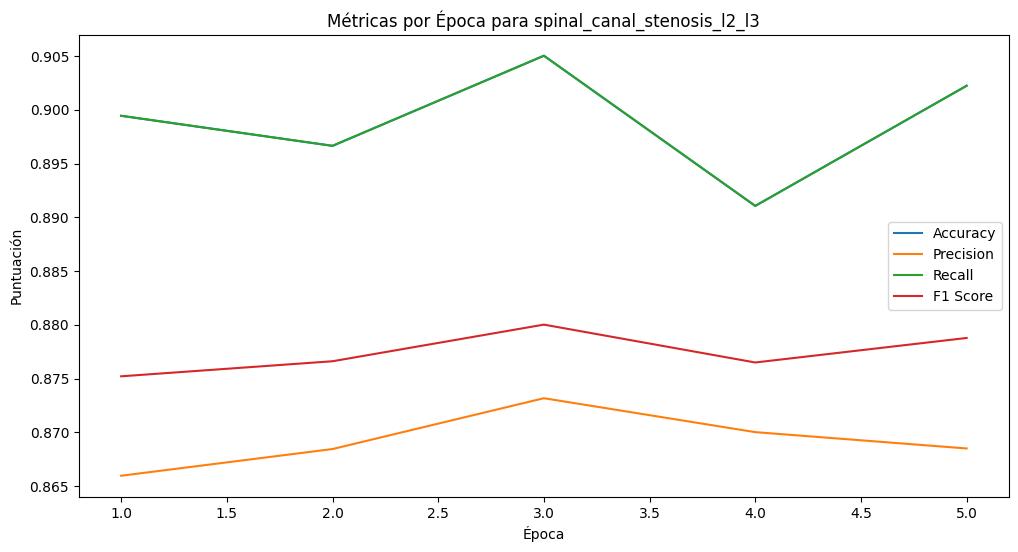

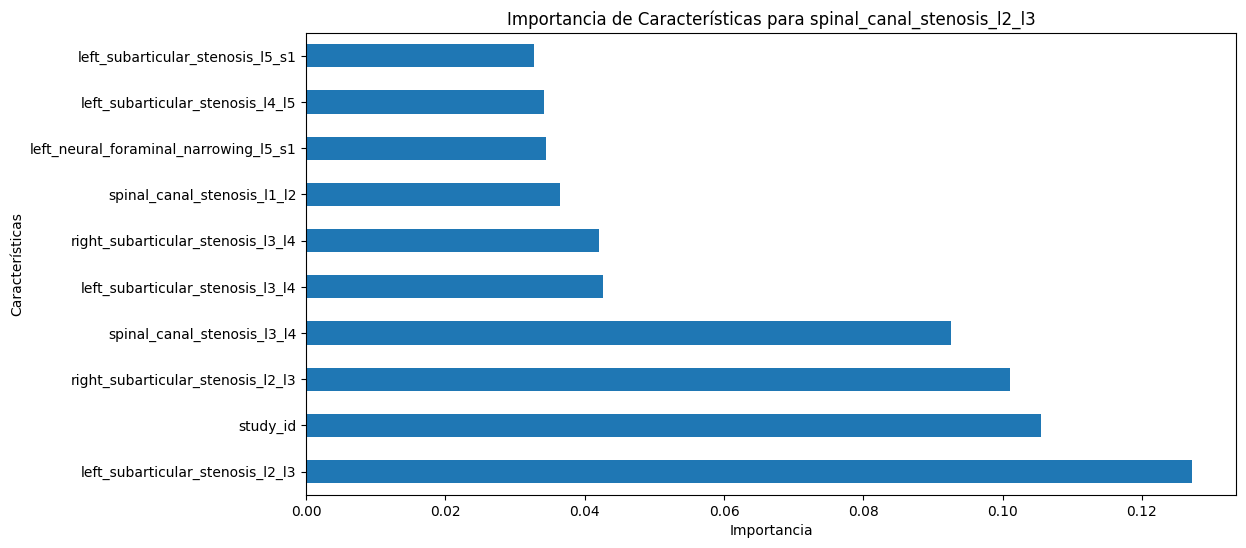

Evaluando modelo para: spinal_canal_stenosis_l3_l4


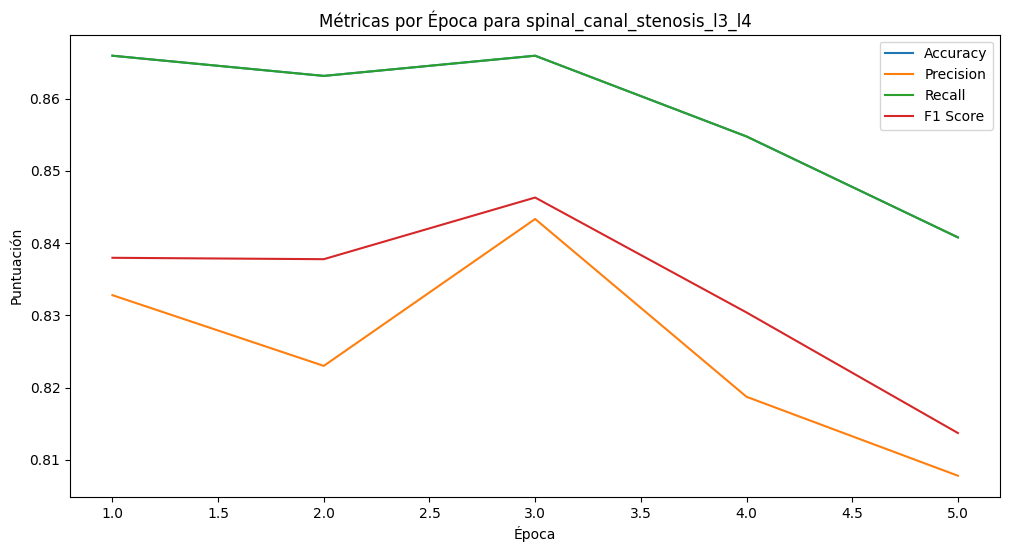

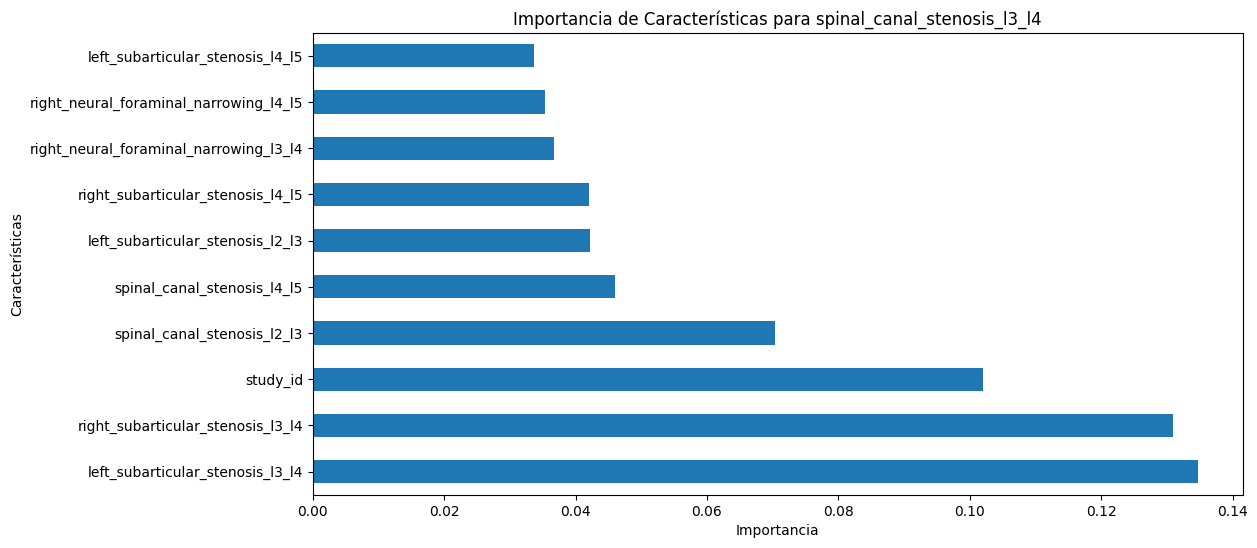

Evaluando modelo para: spinal_canal_stenosis_l4_l5


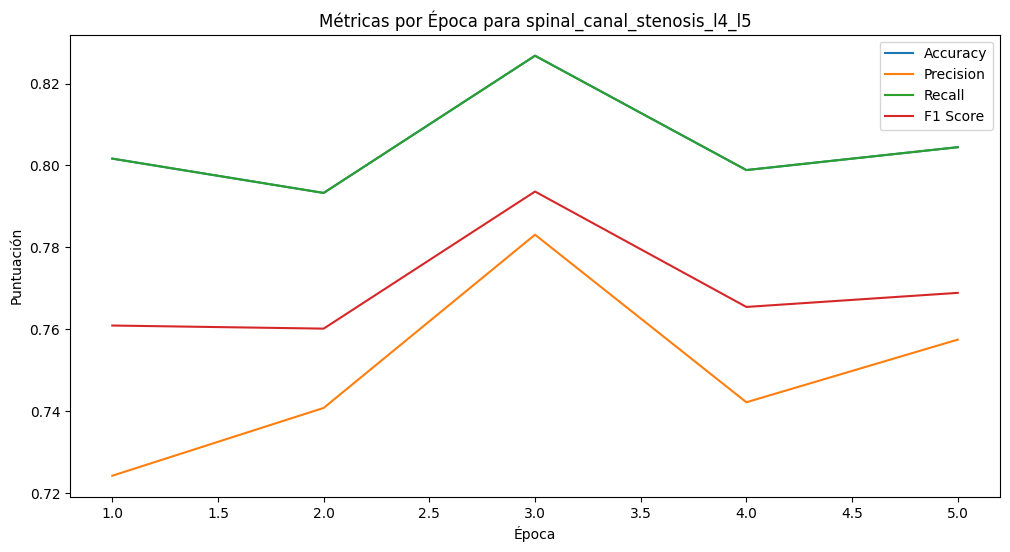

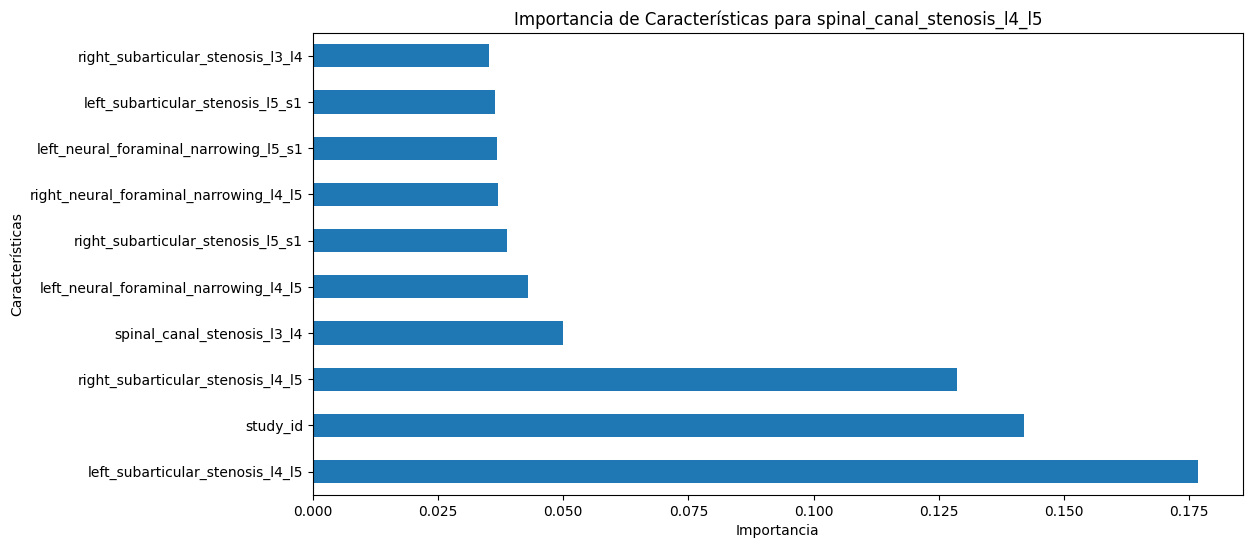

Evaluando modelo para: spinal_canal_stenosis_l5_s1


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

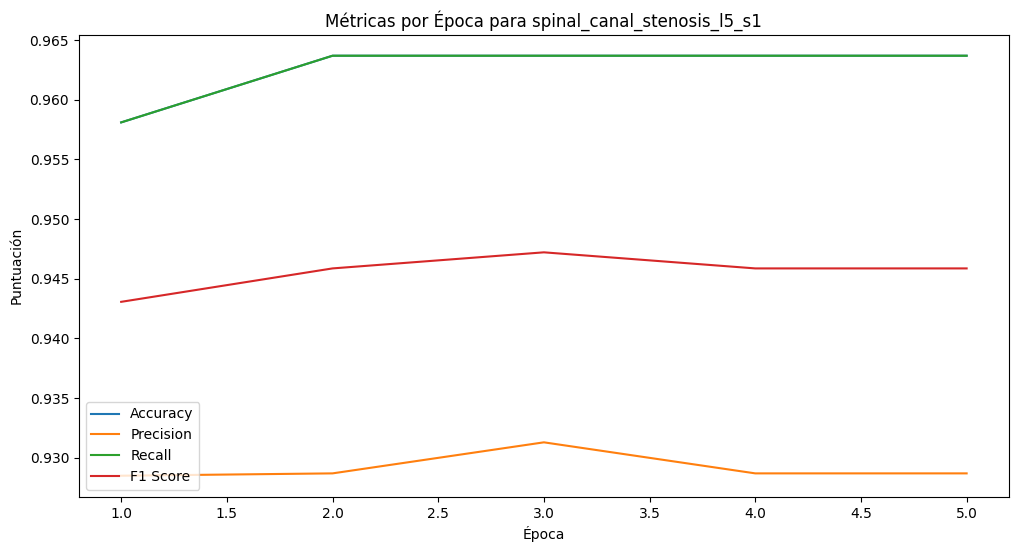

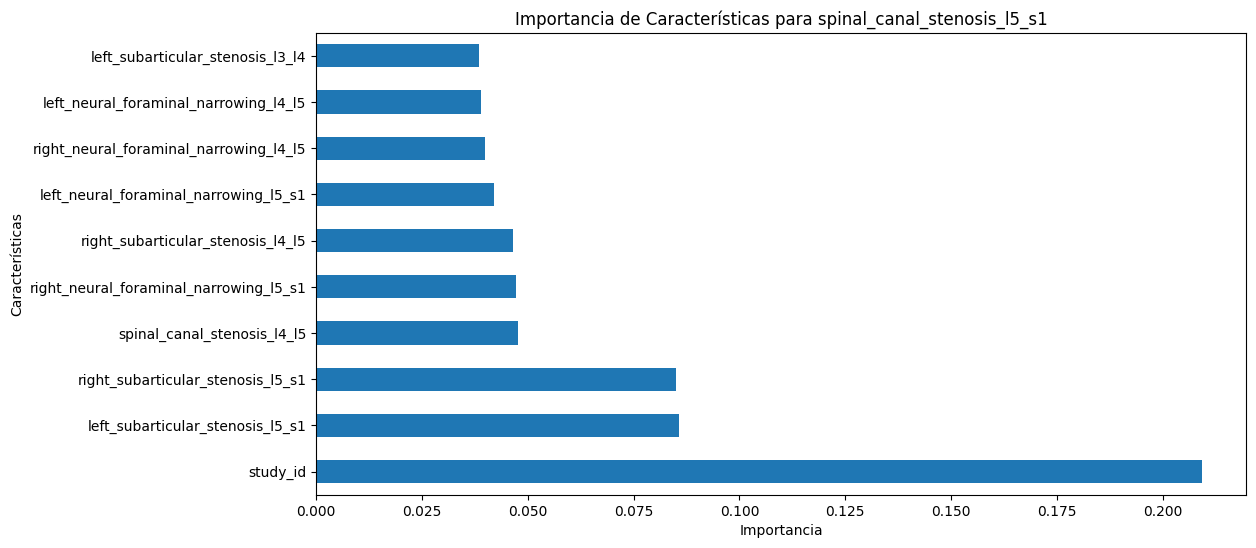

Evaluando modelo para: left_neural_foraminal_narrowing_l1_l2


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


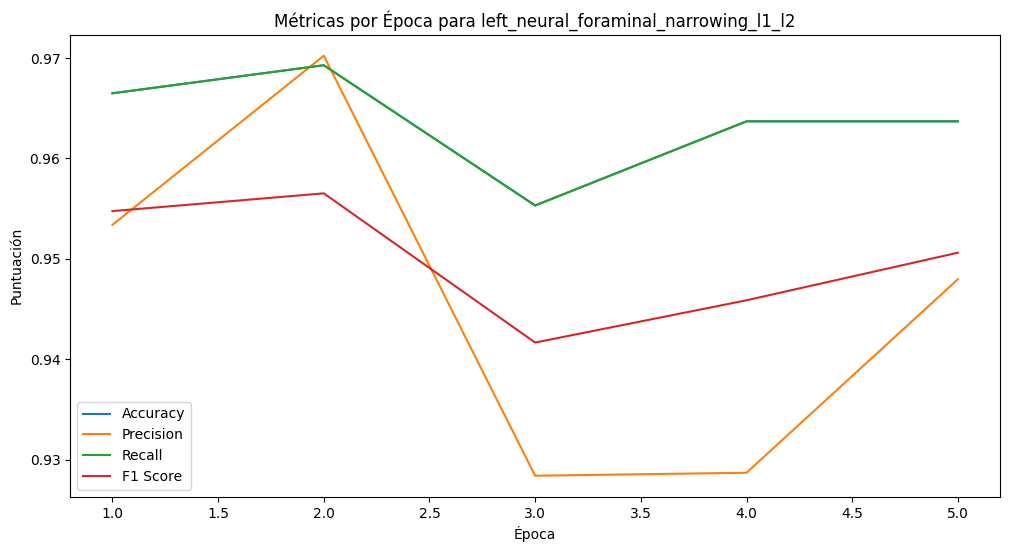

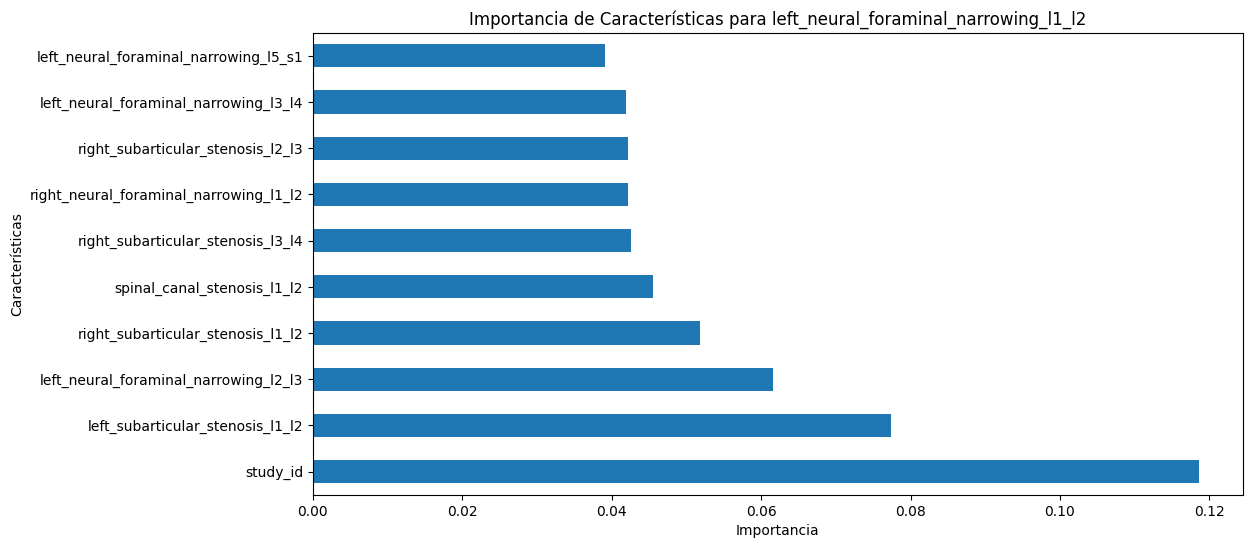

Evaluando modelo para: left_neural_foraminal_narrowing_l2_l3


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

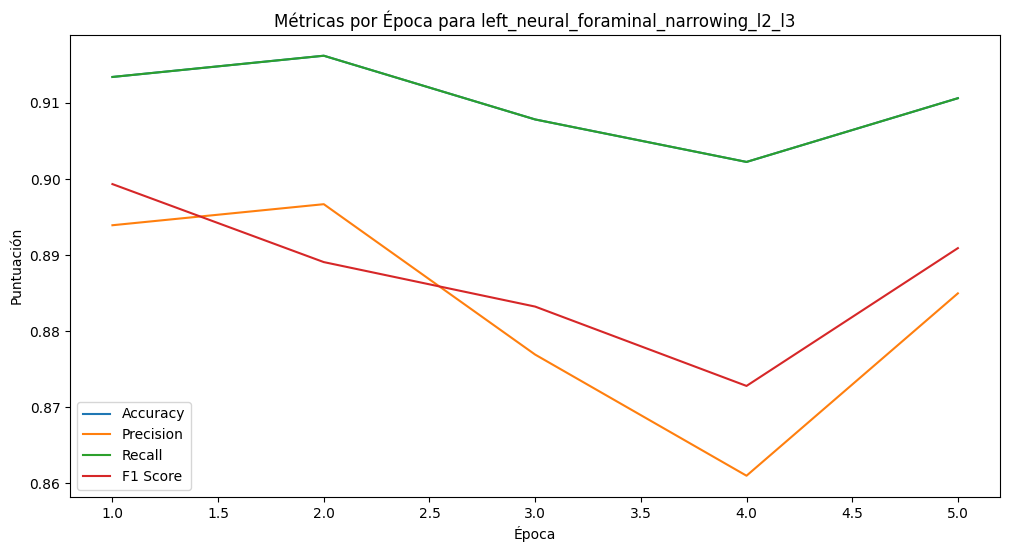

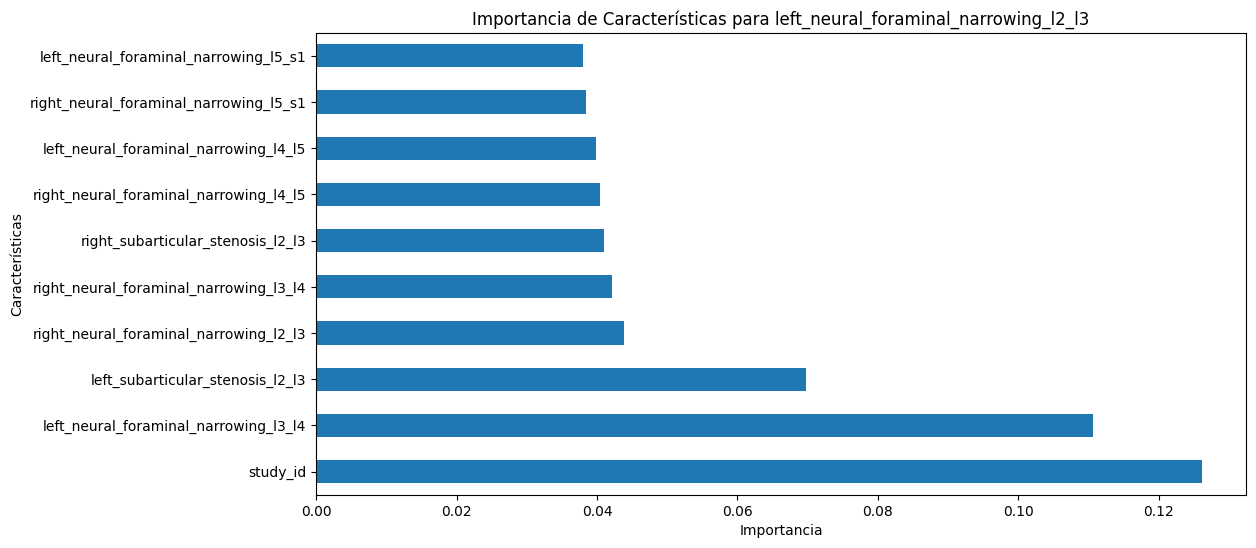

Evaluando modelo para: left_neural_foraminal_narrowing_l3_l4


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

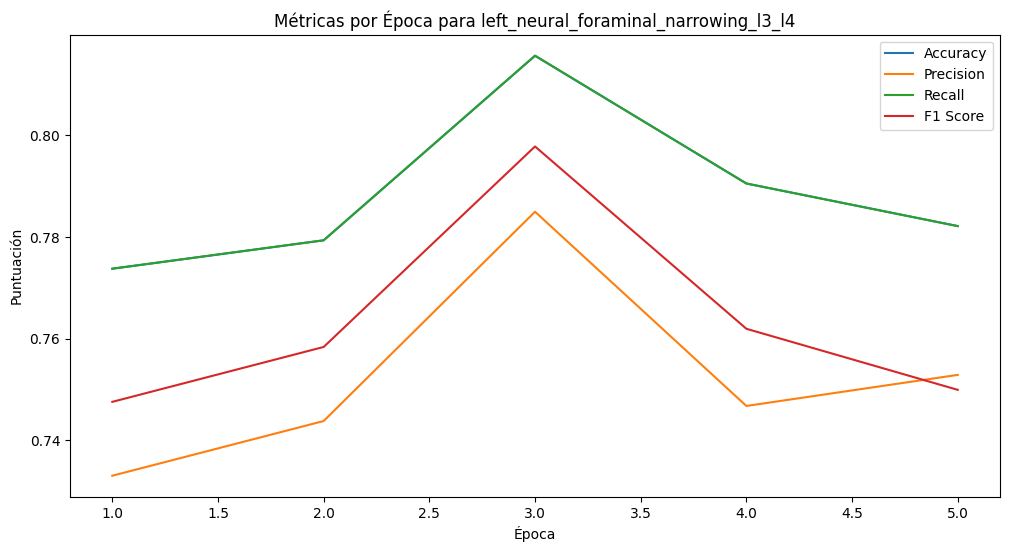

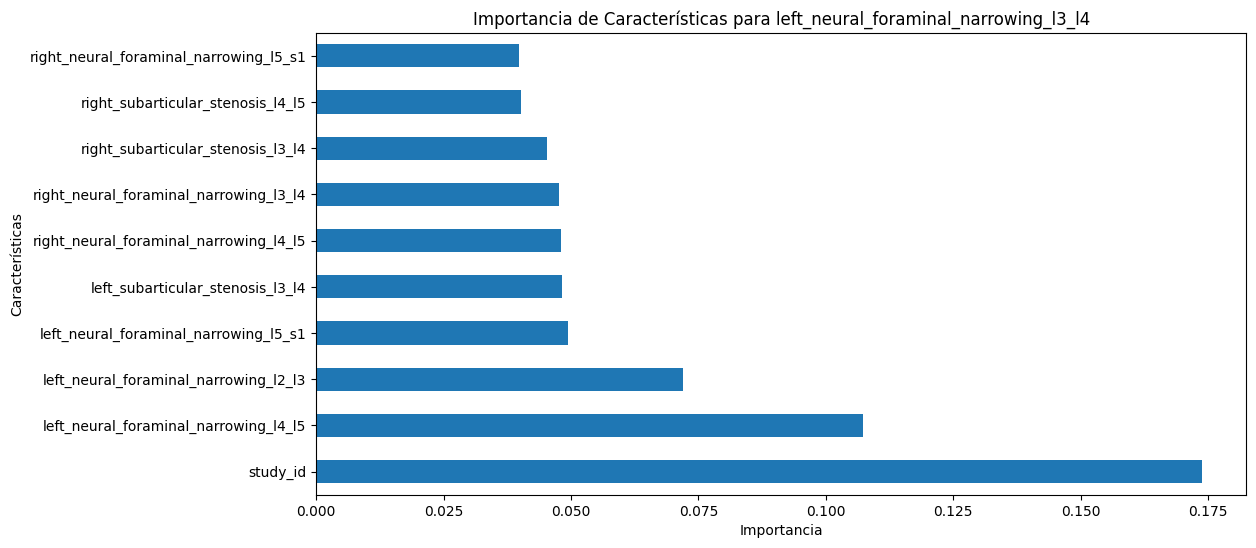

Evaluando modelo para: left_neural_foraminal_narrowing_l4_l5


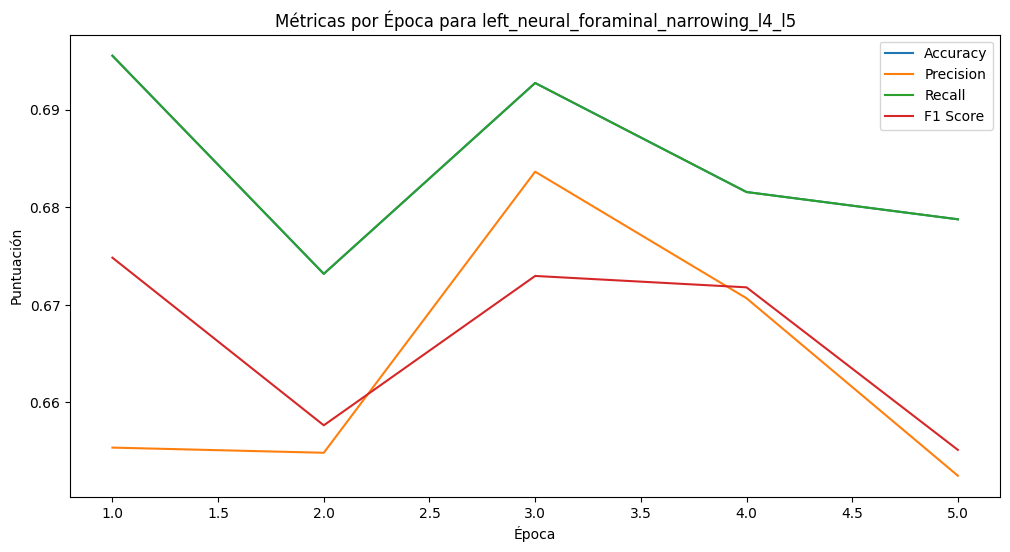

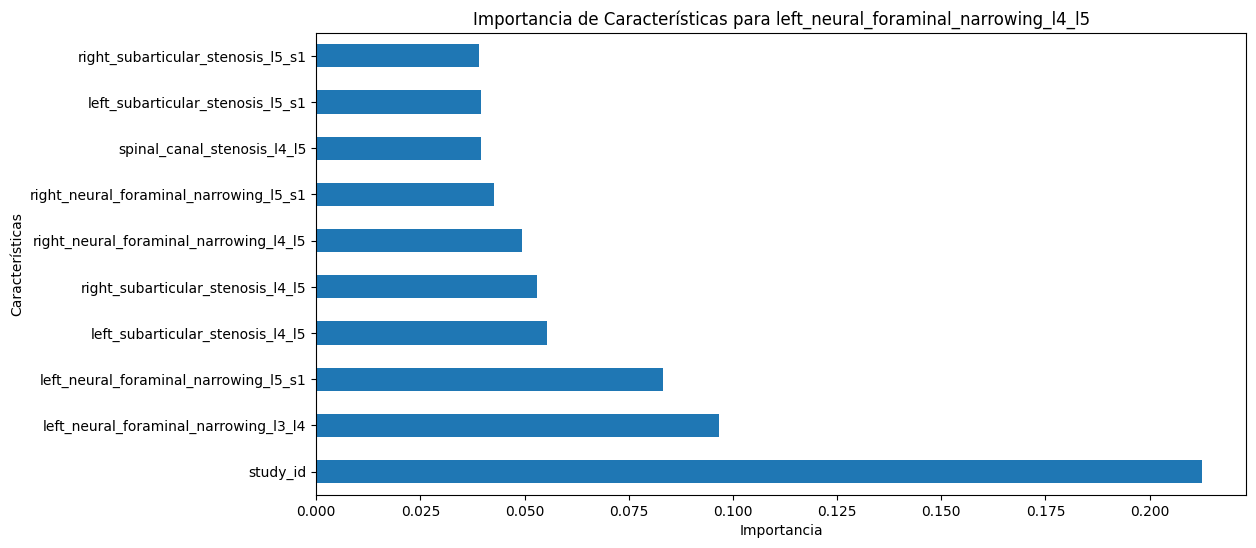

Evaluando modelo para: left_neural_foraminal_narrowing_l5_s1


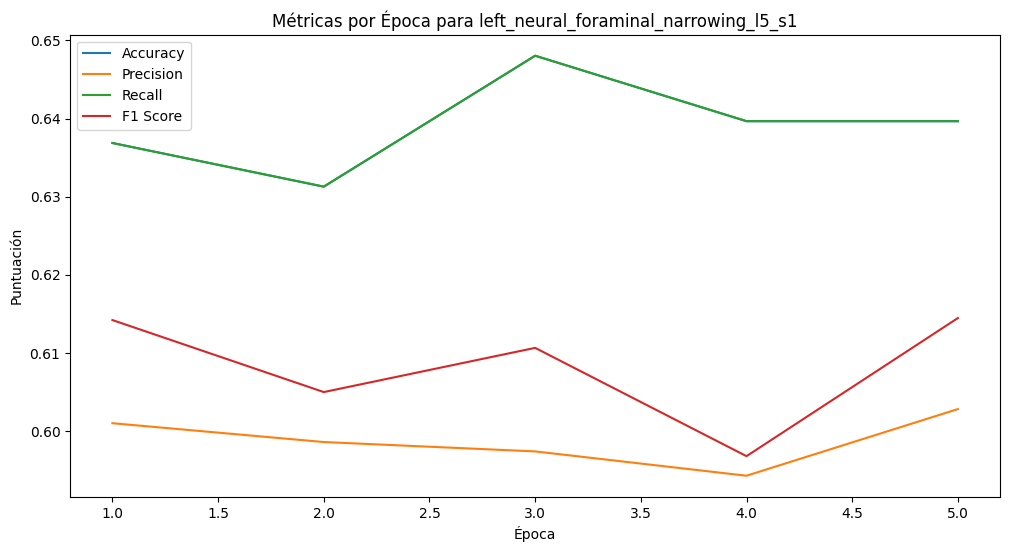

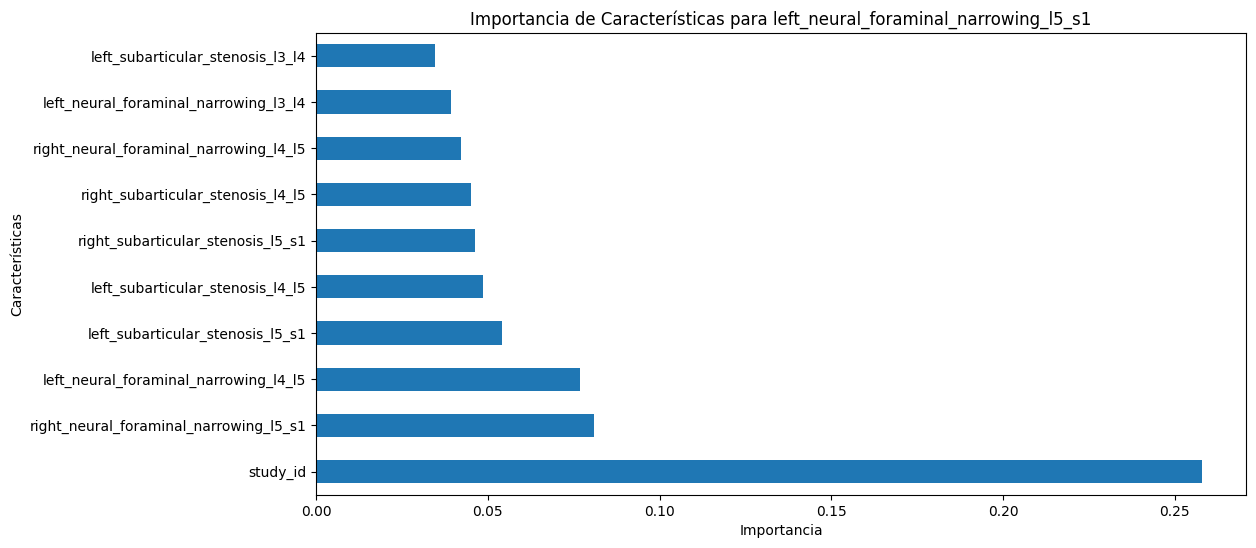

Evaluando modelo para: right_neural_foraminal_narrowing_l1_l2


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

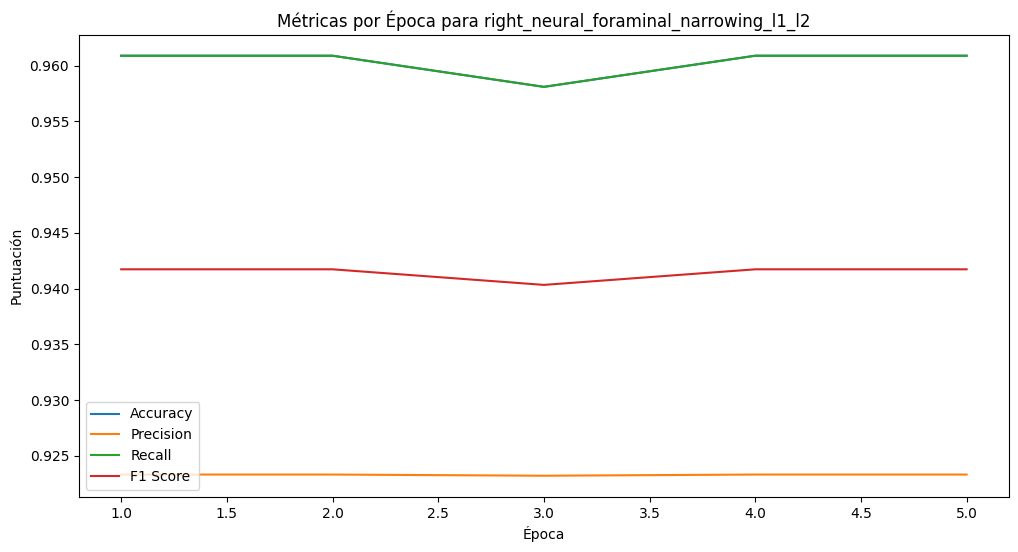

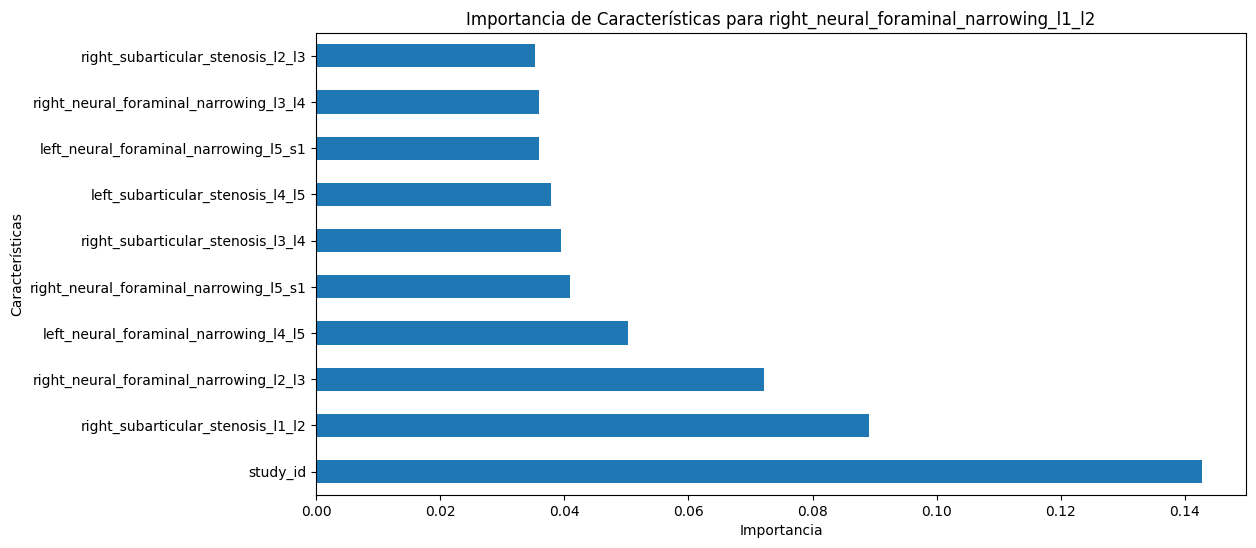

Evaluando modelo para: right_neural_foraminal_narrowing_l2_l3


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

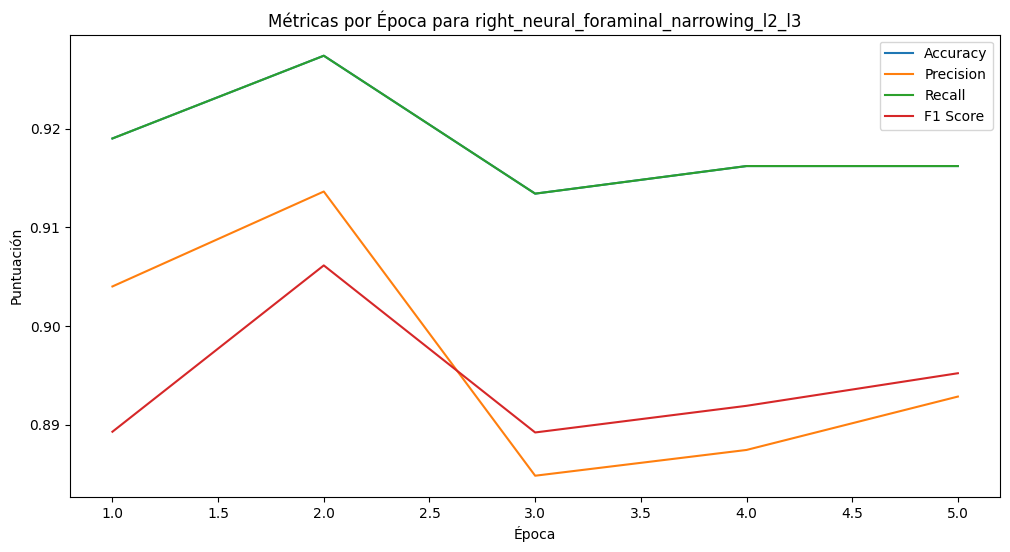

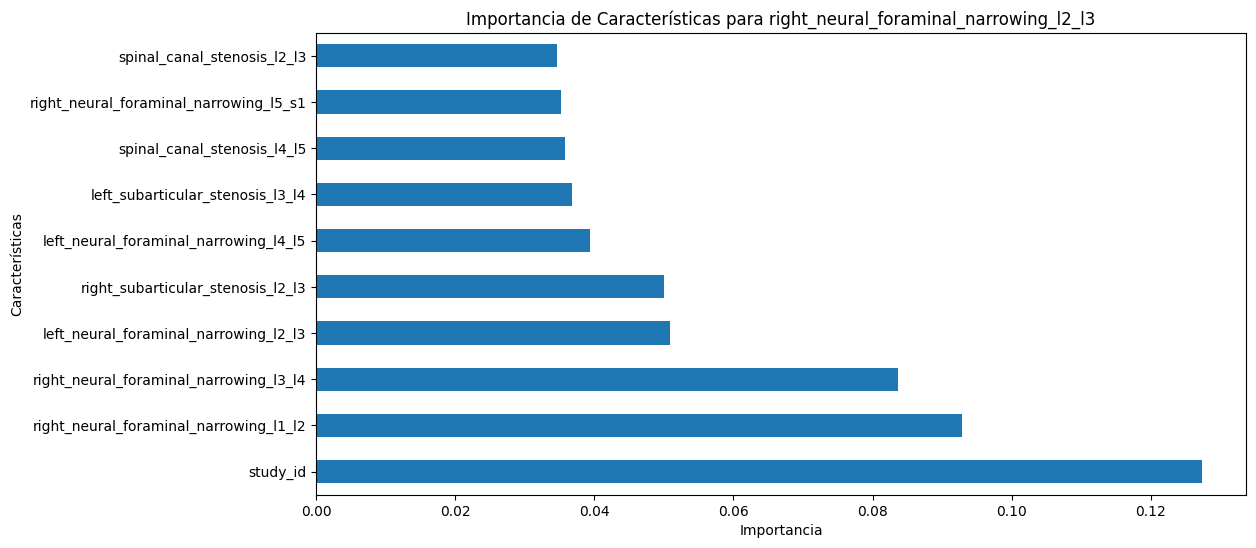

Evaluando modelo para: right_neural_foraminal_narrowing_l3_l4


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

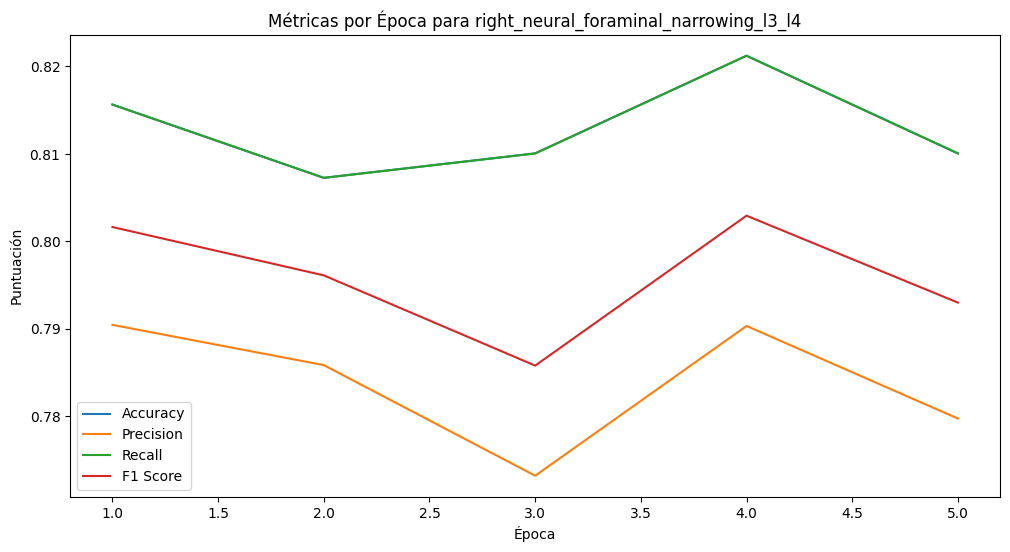

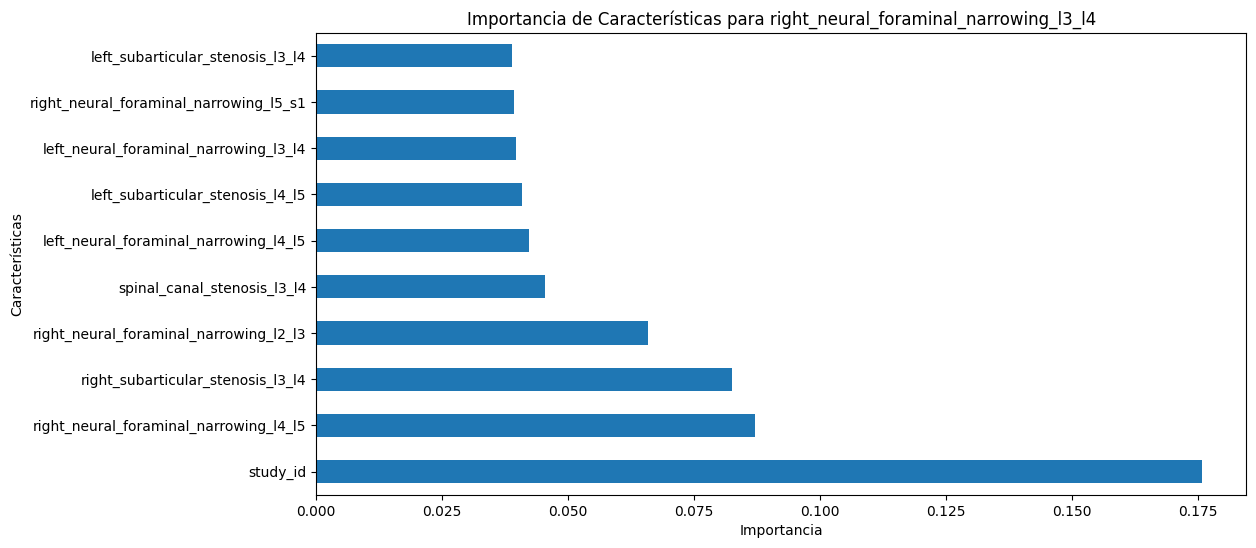

Evaluando modelo para: right_neural_foraminal_narrowing_l4_l5


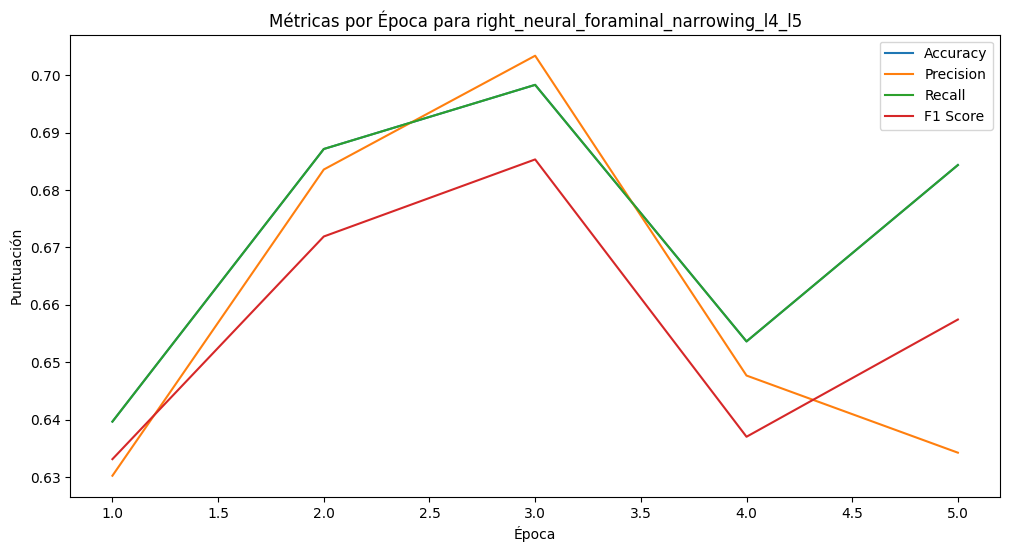

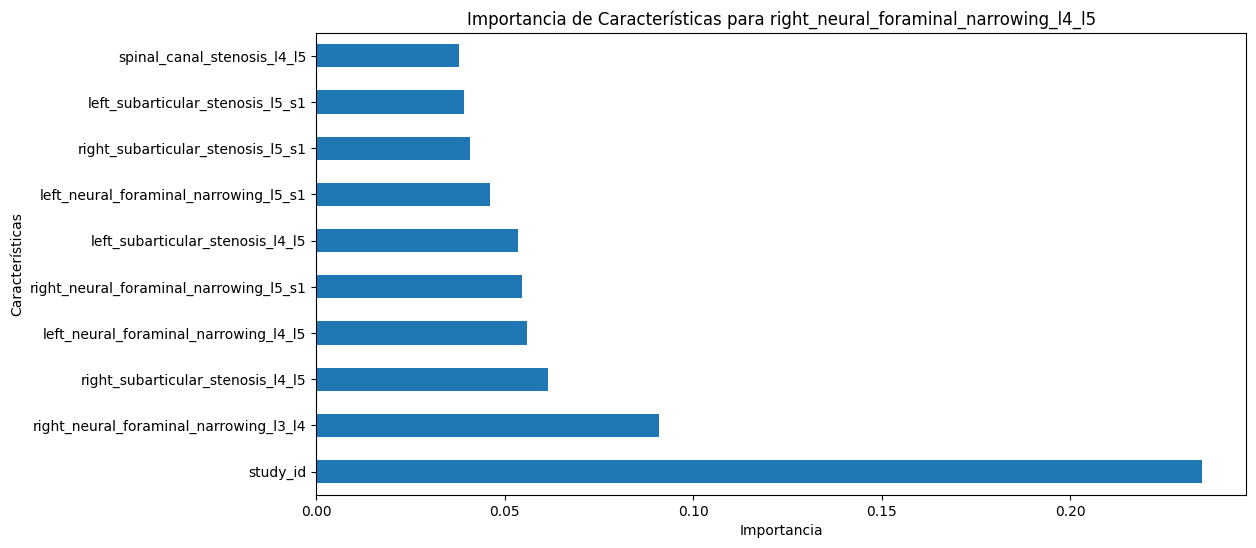

Evaluando modelo para: right_neural_foraminal_narrowing_l5_s1


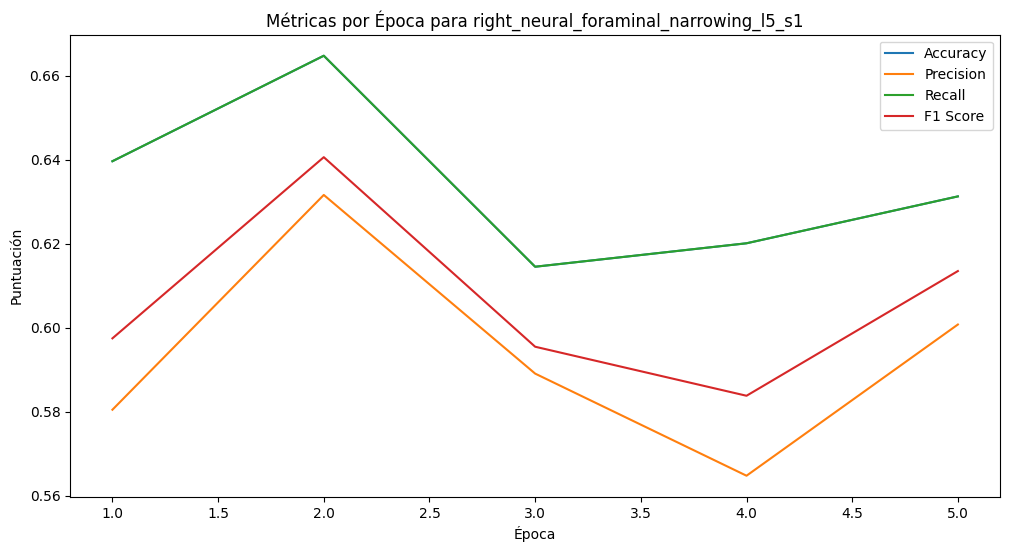

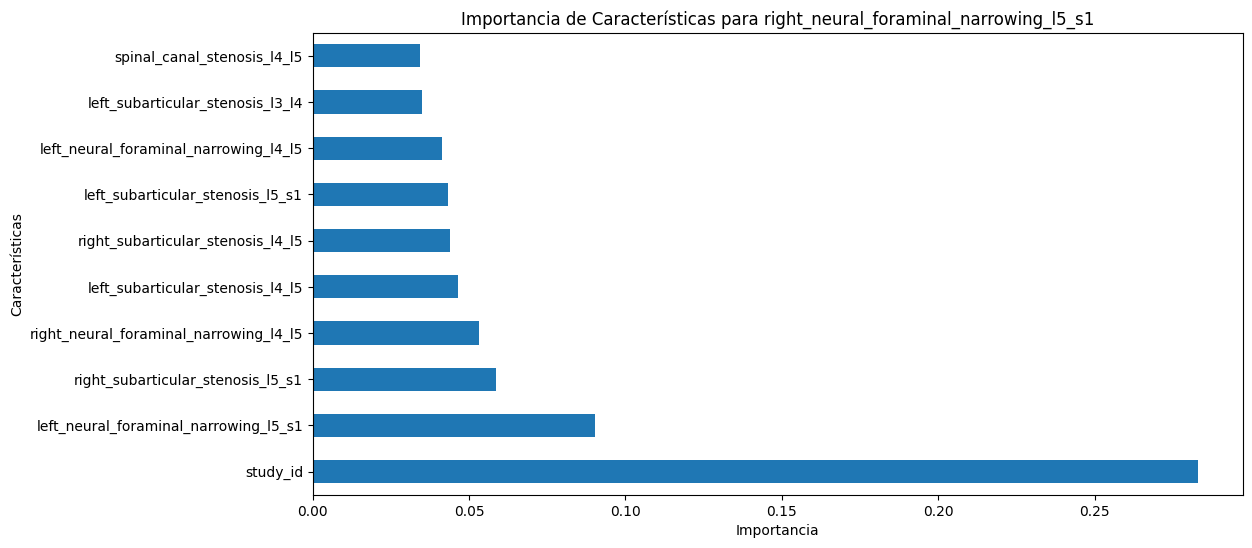

Evaluando modelo para: left_subarticular_stenosis_l1_l2


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


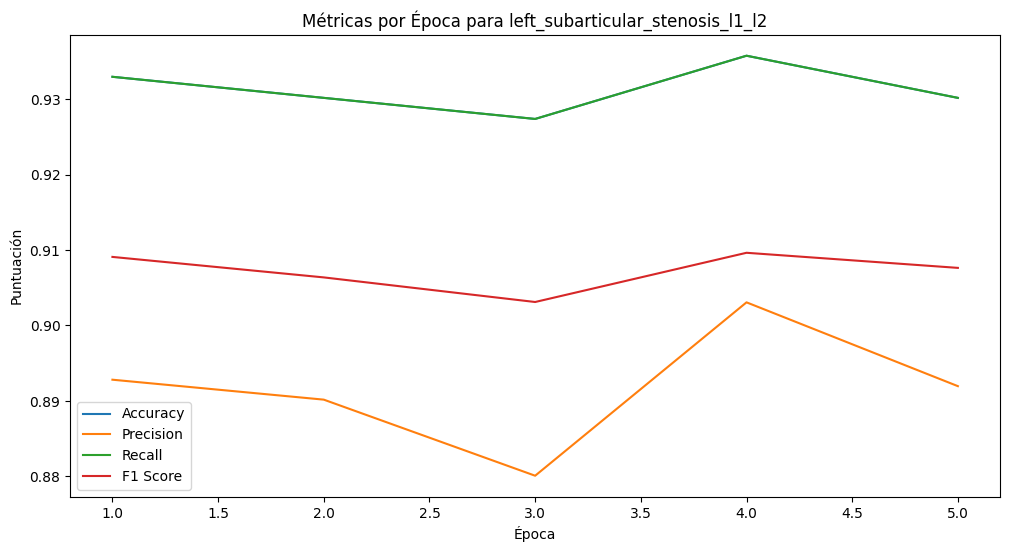

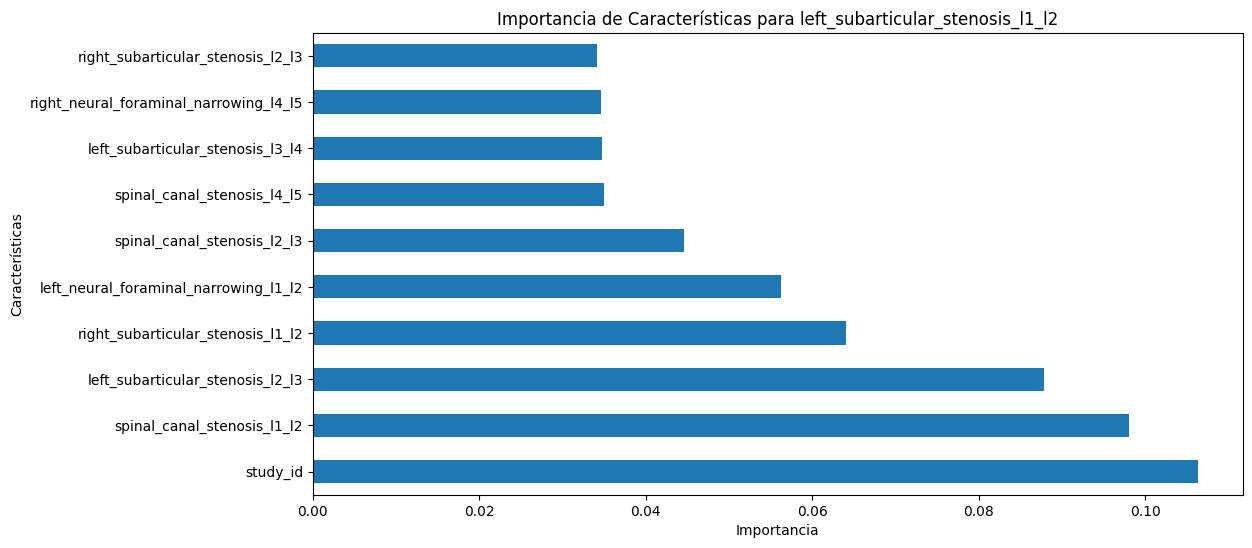

Evaluando modelo para: left_subarticular_stenosis_l2_l3


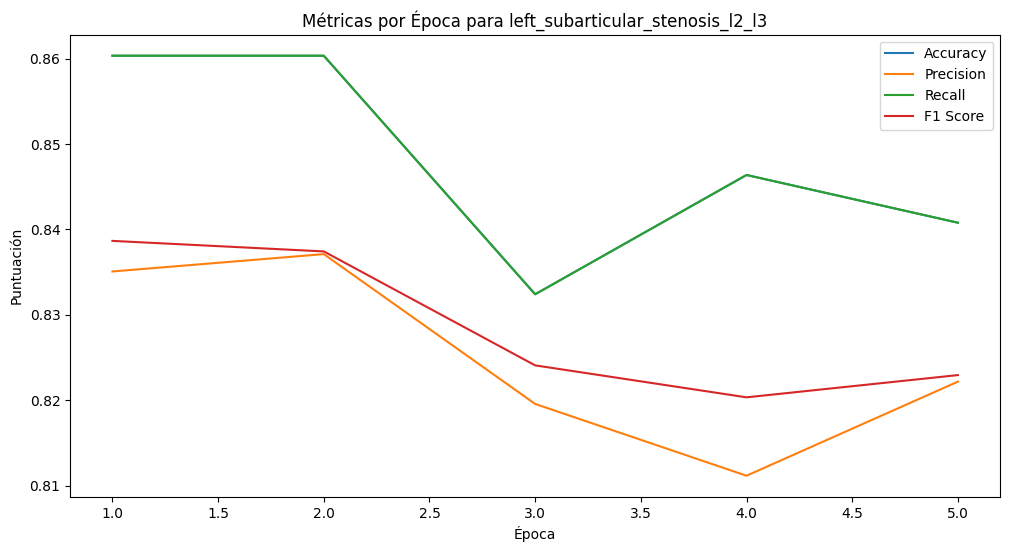

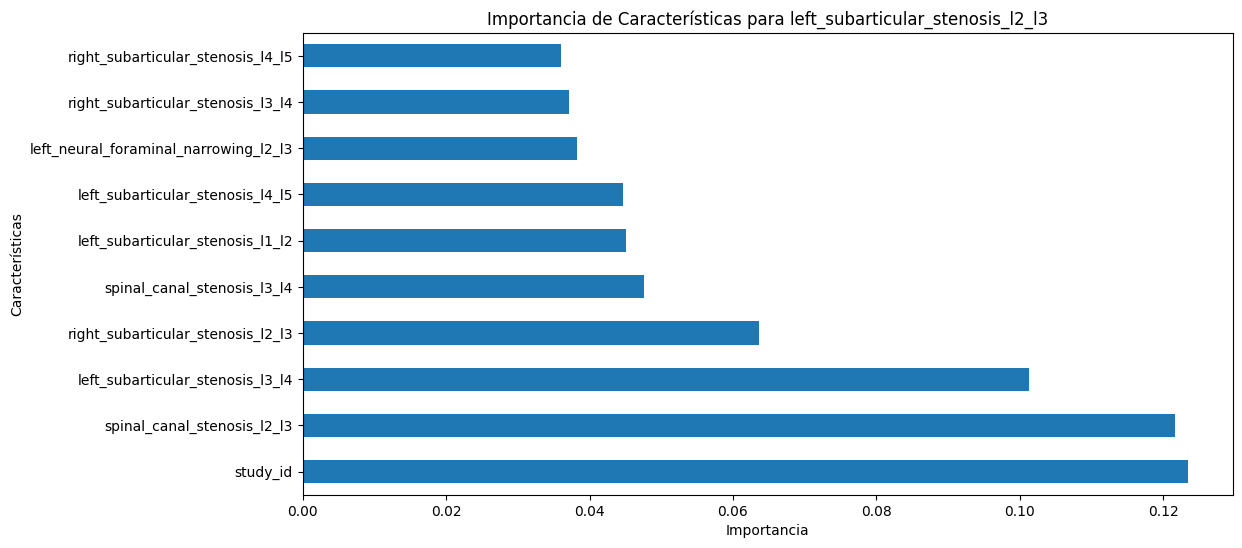

Evaluando modelo para: left_subarticular_stenosis_l3_l4


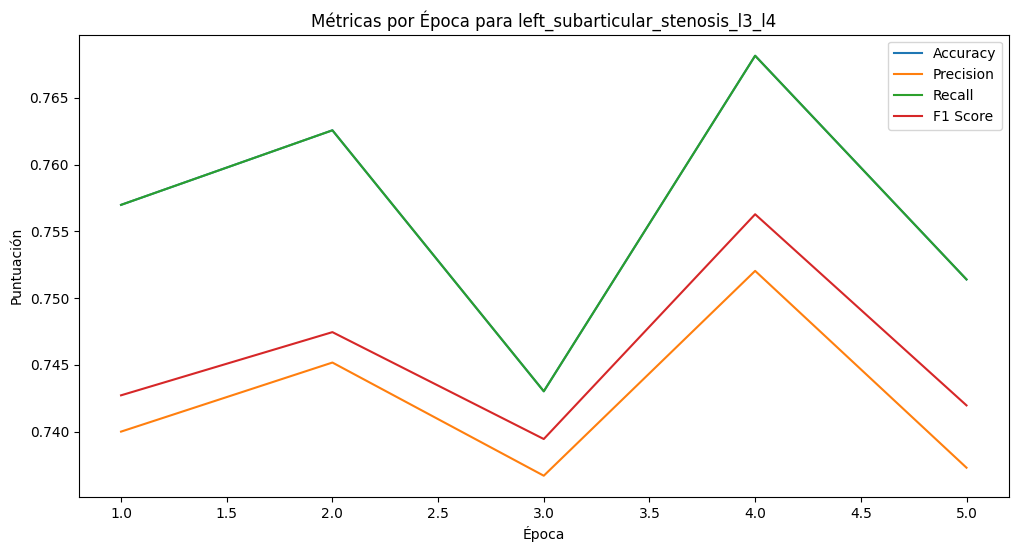

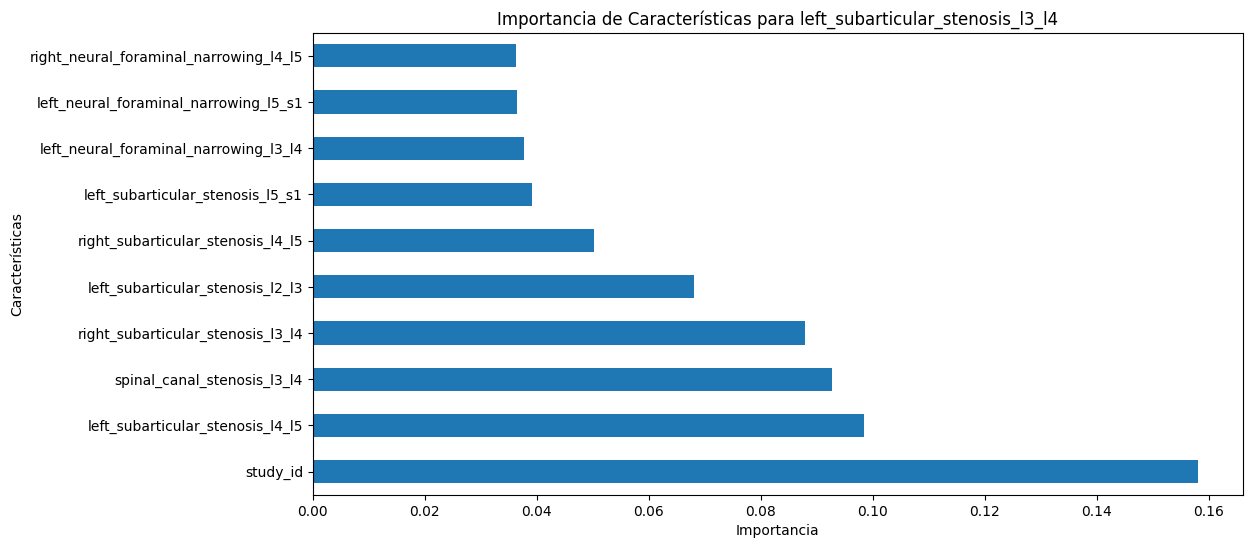

Evaluando modelo para: left_subarticular_stenosis_l4_l5


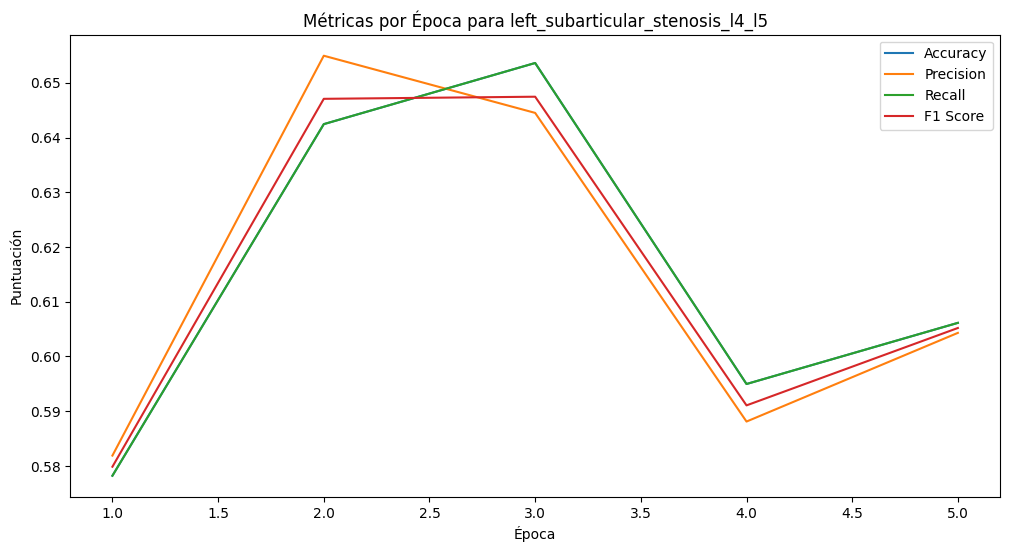

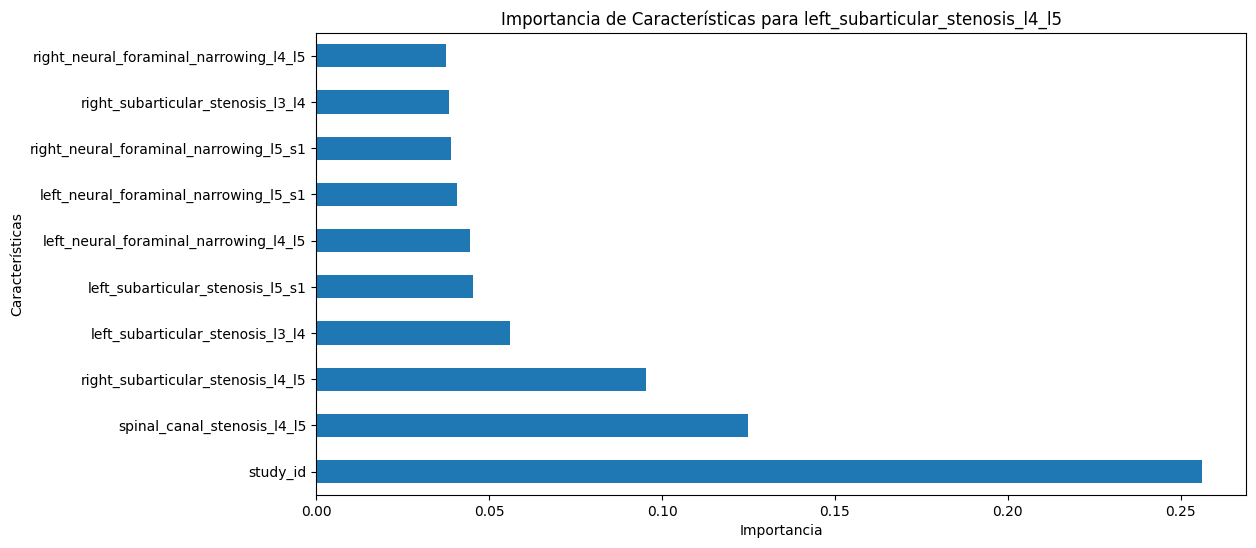

Evaluando modelo para: left_subarticular_stenosis_l5_s1


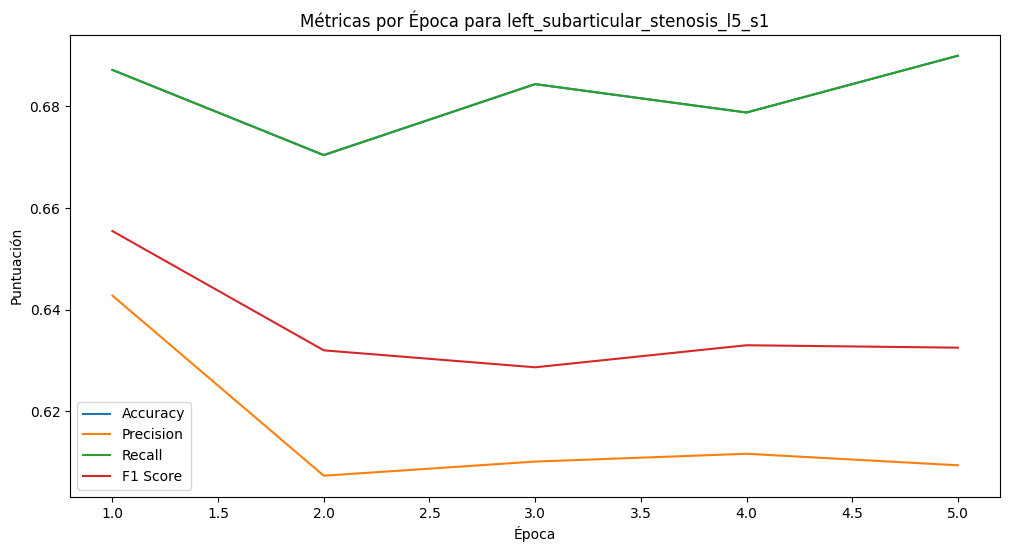

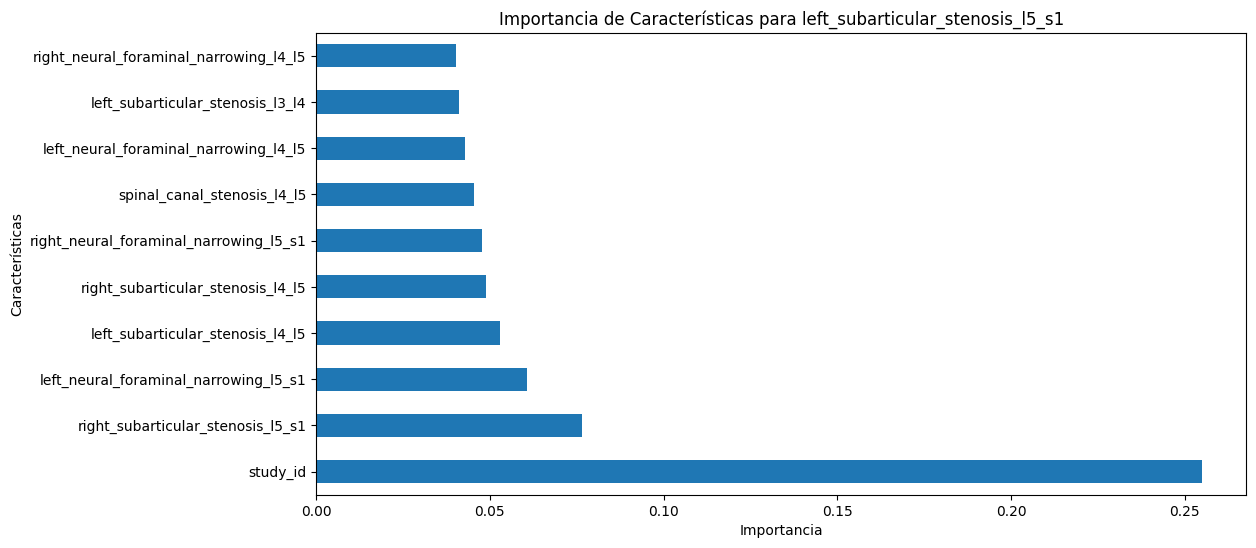

Evaluando modelo para: right_subarticular_stenosis_l1_l2


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

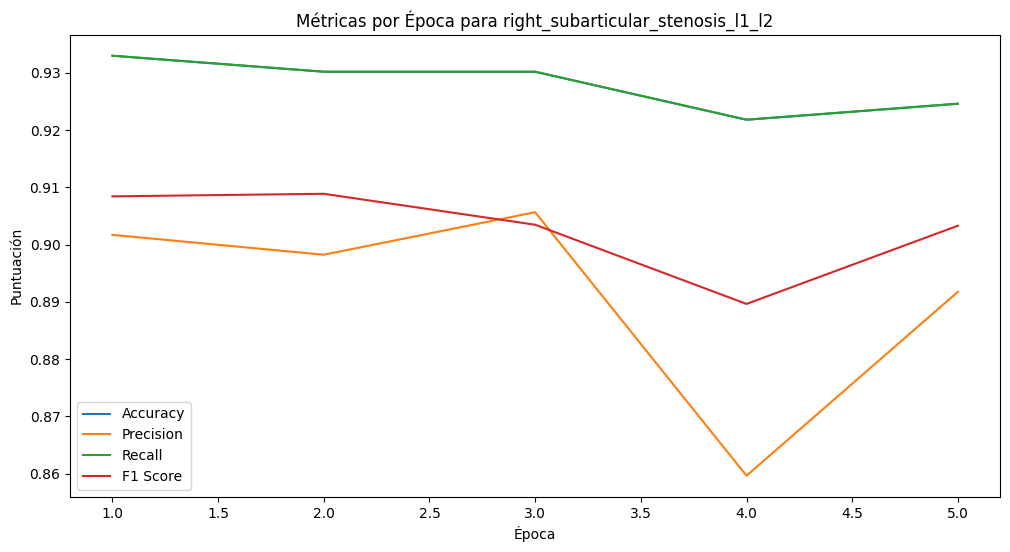

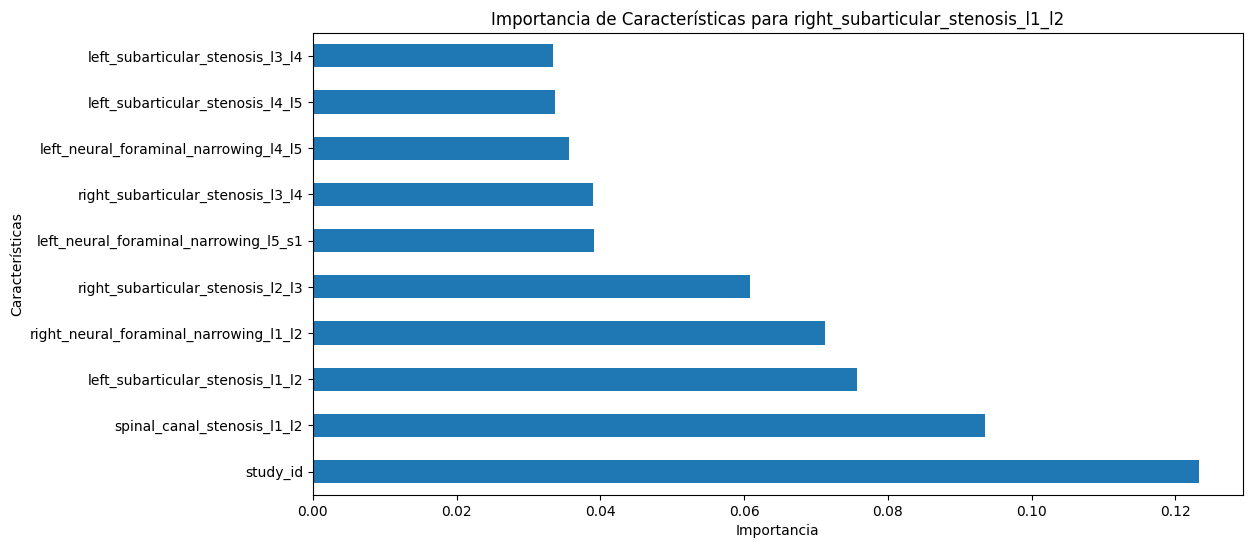

Evaluando modelo para: right_subarticular_stenosis_l2_l3


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


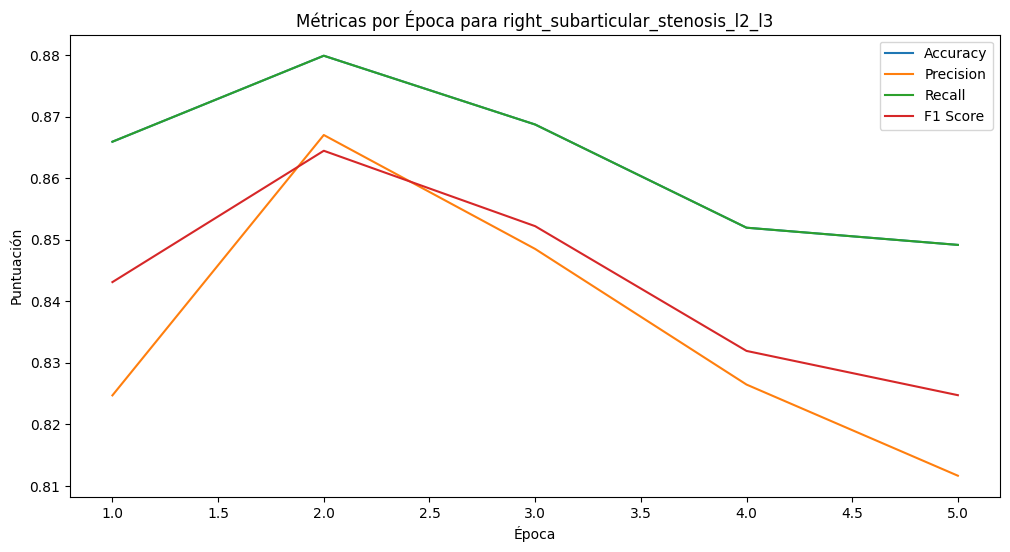

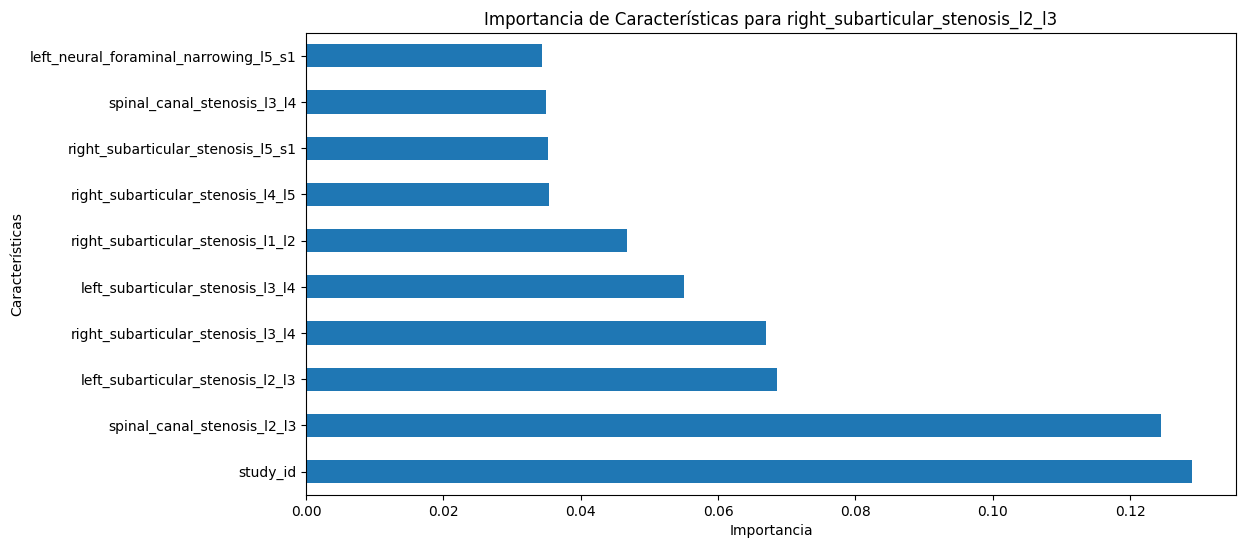

Evaluando modelo para: right_subarticular_stenosis_l3_l4


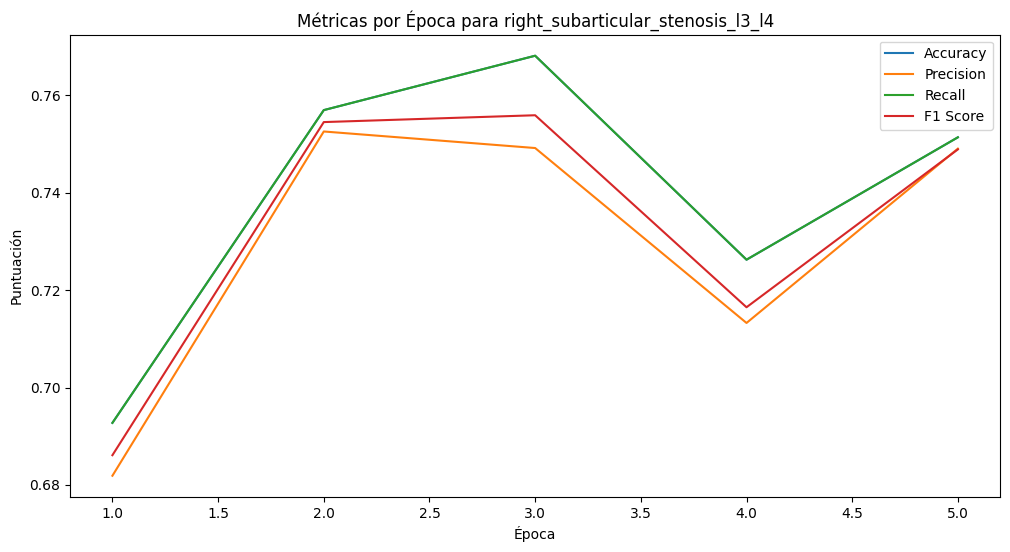

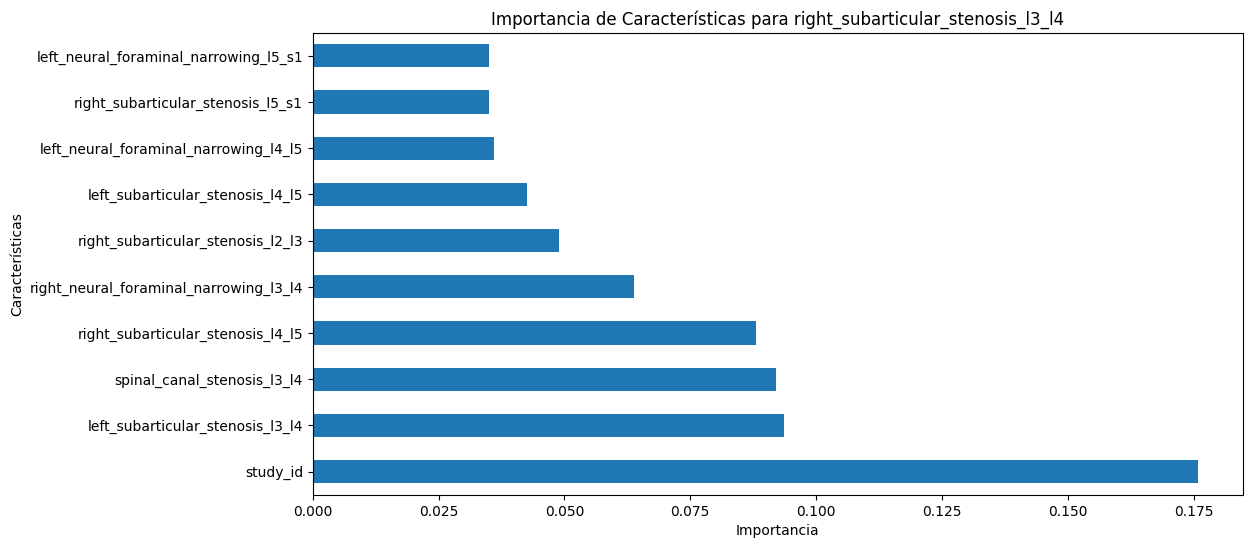

Evaluando modelo para: right_subarticular_stenosis_l4_l5


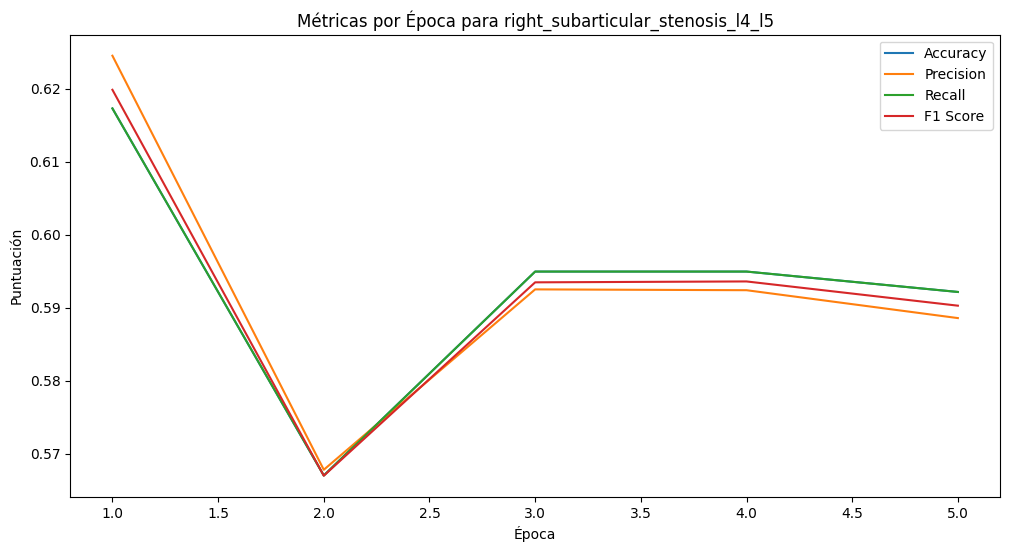

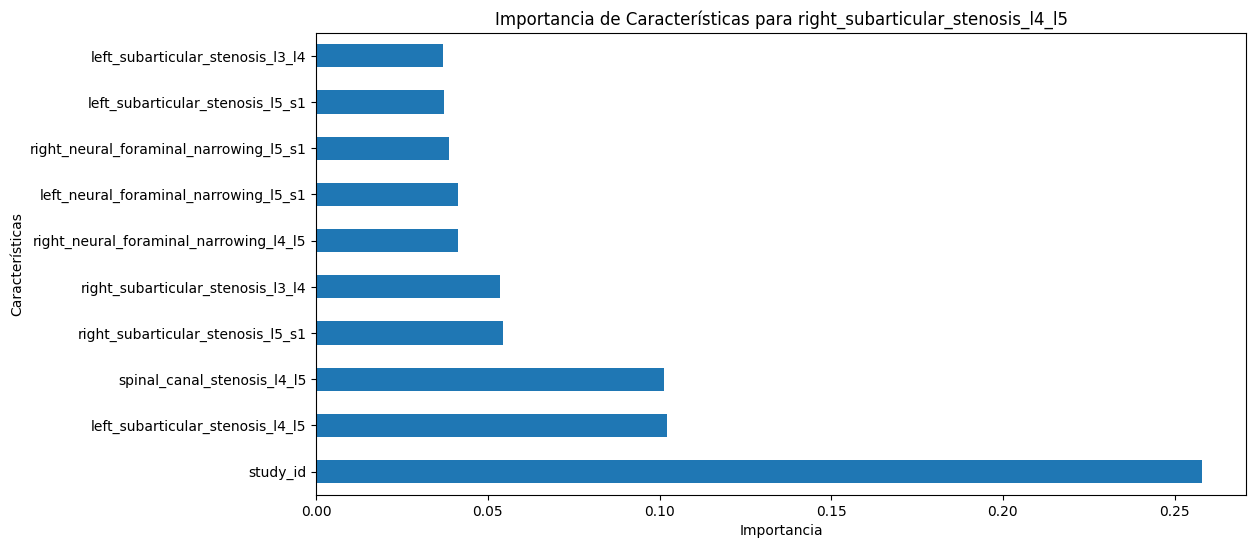

Evaluando modelo para: right_subarticular_stenosis_l5_s1


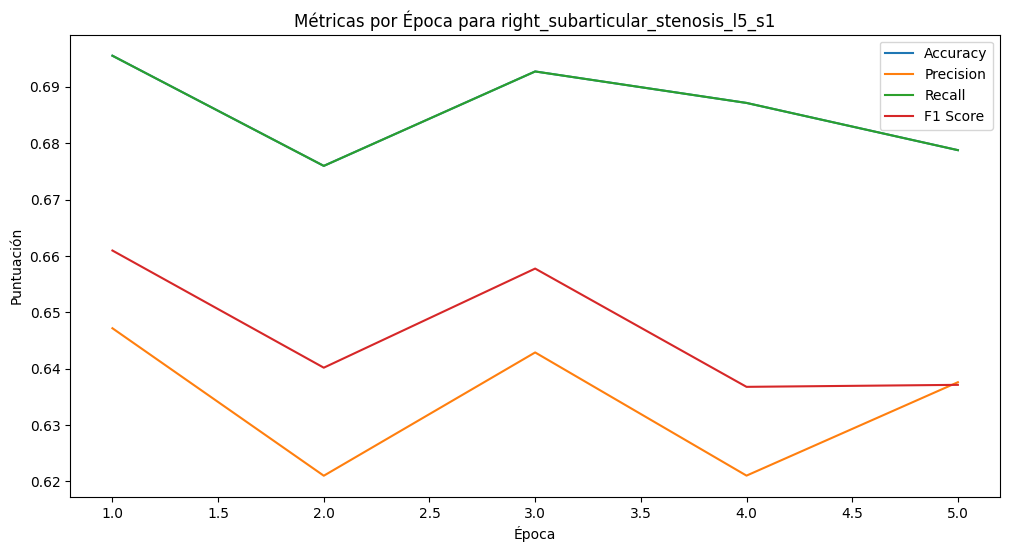

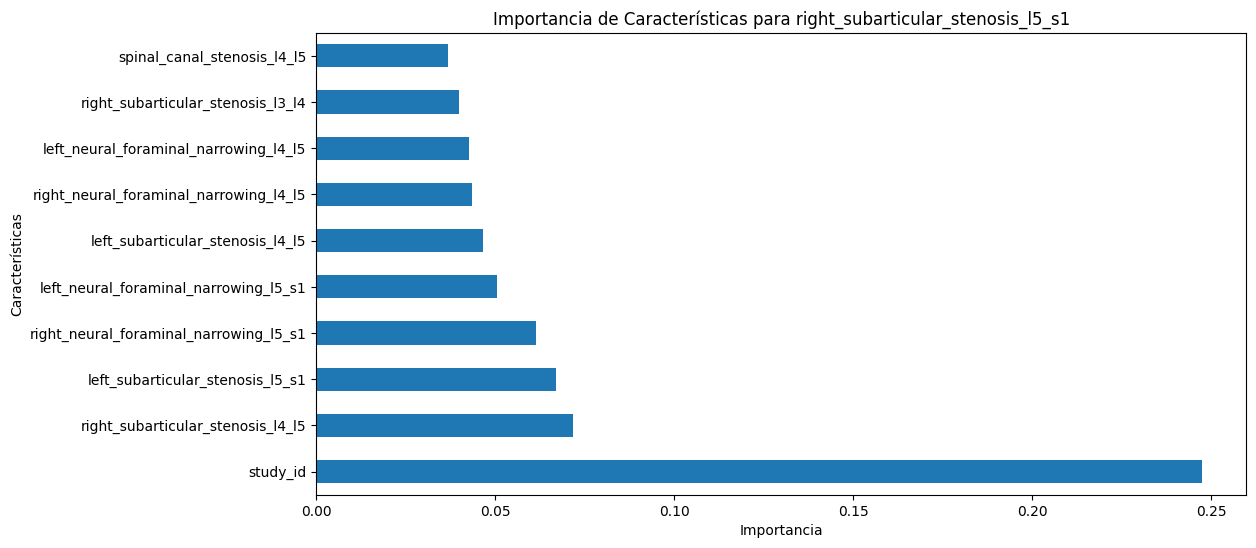

In [33]:
# Entrenar y evaluar el modelo para cada condición y nivel
for col in columns_of_interest:
    print(f"Evaluando modelo para: {col}")
    
    # Definir X (características) e y (etiqueta) para cada condición y nivel
    X = df.drop(columns=[col])
    y = df[col]
    
    # Variables para guardar resultados de cada "época"
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    # Realizar validación cruzada
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Entrenar modelo
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Predicción y evaluación
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        
    # Guardar resultados en diccionarios
    accuracy_dict[col] = accuracies
    report_dict[col] = {
        'precision': precisions,
        'recall': recalls,
        'f1_score': f1_scores
    }
    importance_dict[col] = model.feature_importances_
    
    # Gráficas de métricas para cada condición y nivel
    epochs = range(1, num_folds + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, accuracies, label="Accuracy")
    plt.plot(epochs, precisions, label="Precision")
    plt.plot(epochs, recalls, label="Recall")
    plt.plot(epochs, f1_scores, label="F1 Score")
    plt.xlabel("Época")
    plt.ylabel("Puntuación")
    plt.title(f"Métricas por Época para {col}")
    plt.legend()
    plt.show()
    
    # Importancia de características
    plt.figure(figsize=(12, 6))
    feature_importances = pd.Series(importance_dict[col], index=X.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title(f"Importancia de Características para {col}")
    plt.xlabel("Importancia")
    plt.ylabel("Características")
    plt.show()

In [34]:
# Mostrar el resumen de accuracies
print("Resumen de Accuracy por condición y nivel:")
for condition, accuracy in accuracy_dict.items():
    print(f"{condition}: {accuracy:.4f}")

Resumen de Accuracy por condición y nivel:


TypeError: unsupported format string passed to list.__format__